In [2]:
#importing the libaries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CLEANING THE DATA AND IDENTIFYING THE KPIs

In [3]:
df = pd.read_csv(r'C:\Users\91847\Desktop\Everything\Skills\DATA ANALYTICS\DATASETS\Online Sales in USA\sales.csv', encoding='unicode_escape', dtype={0: str})

In [4]:
df.shape

(286392, 36)

In [5]:
df.head()

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,100354678,2020-10-01,received,574772.0,oasis_Oasis-064-36,21.0,89.9,1798.0,0.0,1798.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,2020-10-01,received,574774.0,Fantastic_FT-48,11.0,19.0,190.0,0.0,190.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2,100354680,2020-10-01,complete,574777.0,mdeal_DMC-610-8,9.0,149.9,1199.2,0.0,1199.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
3,100354680,2020-10-01,complete,574779.0,oasis_Oasis-061-36,9.0,79.9,639.2,0.0,639.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
4,100367357,2020-11-13,received,595185.0,MEFNAR59C38B6CA08CD,2.0,99.9,99.9,0.0,99.9,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          286392 non-null  object 
 1   order_date        286392 non-null  object 
 2   status            286392 non-null  object 
 3   item_id           286392 non-null  float64
 4   sku               286392 non-null  object 
 5   qty_ordered       286392 non-null  float64
 6   price             286392 non-null  float64
 7   value             286392 non-null  float64
 8   discount_amount   286392 non-null  float64
 9   total             286392 non-null  float64
 10  category          286392 non-null  object 
 11  payment_method    286392 non-null  object 
 12  bi_st             286392 non-null  object 
 13  cust_id           286392 non-null  float64
 14  year              286392 non-null  int64  
 15  month             286392 non-null  object 
 16  ref_num           28

In [7]:
pd.set_option('display.max_columns', None)
print(df)

         order_id  order_date      status   item_id                    sku  \
0       100354678  2020-10-01    received  574772.0     oasis_Oasis-064-36   
1       100354678  2020-10-01    received  574774.0        Fantastic_FT-48   
2       100354680  2020-10-01    complete  574777.0        mdeal_DMC-610-8   
3       100354680  2020-10-01    complete  574779.0     oasis_Oasis-061-36   
4       100367357  2020-11-13    received  595185.0    MEFNAR59C38B6CA08CD   
...           ...         ...         ...       ...                    ...   
286387  100562365  2021-09-30        paid  905179.0    APPCHA5AF14939B8F8A   
286388  100562376  2021-09-30         cod  905191.0    MEFCOT5A8D1E973B886   
286389  100562383  2021-09-30         cod  905200.0  WOFVAL59D5EA84167F9-M   
286390  100562384  2021-09-30         cod  905202.0  WOFNIG5B4D7EB0E9FDD-L   
286391  100562386  2021-09-30  processing  905205.0    MATHUA5AF70A7D1E50A   

        qty_ordered   price   value  discount_amount   total  \

In [8]:
df['order_date'] = pd.to_datetime(df['order_date'])
#changing the data type of order_date to date time data from object datatype for greater convenience

In [9]:
df['cust_id'] = df['cust_id'].astype(str)
df['age'] = df['age'].astype(int)

In [10]:
unnecessary_columns = ['order_id', 'item_id', 'sku', 'ref_num', 'Name Prefix', 'Middle Initial', 'Last Name', 'full_name', 'SSN', 'User Name']
df = df.drop(columns=unnecessary_columns)
# Dropping the unnecessary columns and printing the updated DataFrame
print(df.head())

  order_date    status  qty_ordered  price   value  discount_amount   total  \
0 2020-10-01  received         21.0   89.9  1798.0              0.0  1798.0   
1 2020-10-01  received         11.0   19.0   190.0              0.0   190.0   
2 2020-10-01  complete          9.0  149.9  1199.2              0.0  1199.2   
3 2020-10-01  complete          9.0   79.9   639.2              0.0   639.2   
4 2020-11-13  received          2.0   99.9    99.9              0.0    99.9   

        category payment_method  bi_st  cust_id  year     month First Name  \
0  Men's Fashion            cod  Valid  60124.0  2020  Oct-2020       Jani   
1  Men's Fashion            cod  Valid  60124.0  2020  Oct-2020       Jani   
2  Men's Fashion            cod    Net  60124.0  2020  Oct-2020       Jani   
3  Men's Fashion            cod    Net  60124.0  2020  Oct-2020       Jani   
4  Men's Fashion            cod  Valid  60124.0  2020  Nov-2020       Jani   

  Gender  age                E Mail Customer Since    Ph

# EXPLORATORY DATA ANALYSIS

In [17]:
total_sales = df['total'].sum()
average_order_value = df['total'].mean()

print(f"Total Sales: ${total_sales:.2f}")
print(f"Average Order Value: ${average_order_value:.2f}")

Total Sales: $233650194.43
Average Order Value: $815.84


In [14]:
# Calculate the total sales for each month
monthly_sales = df.groupby(['year', 'month'])['total'].sum().reset_index()

# Calculate the average monthly sales
avg_monthly_sales = monthly_sales['total'].mean()

# Find the month with the highest sales
highest_sales_month = monthly_sales.loc[monthly_sales['total'].idxmax()]

# Find the month with the lowest sales
lowest_sales_month = monthly_sales.loc[monthly_sales['total'].idxmin()]

# Calculate the percentage difference of the highest performing month compared to the average
highest_percent_diff = ((highest_sales_month['total'] - avg_monthly_sales) / avg_monthly_sales) * 100

# Calculate the percentage difference of the lowest performing month compared to the average
lowest_percent_diff = ((lowest_sales_month['total'] - avg_monthly_sales) / avg_monthly_sales) * 100

# Print the results
print(f"Average Monthly Sales: ${avg_monthly_sales:.2f}")
print(f"Highest Sales Month: {highest_sales_month['month']} {highest_sales_month['year']} - ${highest_sales_month['total']:.2f}")
print(f"Lowest Sales Month: {lowest_sales_month['month']} {lowest_sales_month['year']} - ${lowest_sales_month['total']:.2f}")
print(f"Highest Performing Month Percentage Difference: {highest_percent_diff:.2f}%")
print(f"Lowest Performing Month Percentage Difference: {lowest_percent_diff:.2f}%")

Average Monthly Sales: $19470849.54
Highest Sales Month: Dec-2020 2020 - $57666990.00
Lowest Sales Month: Feb-2021 2021 - $4404198.38
Highest Performing Month Percentage Difference: 196.17%
Lowest Performing Month Percentage Difference: -77.38%


# Sales trend over time: Line graph showing total sales per month or year

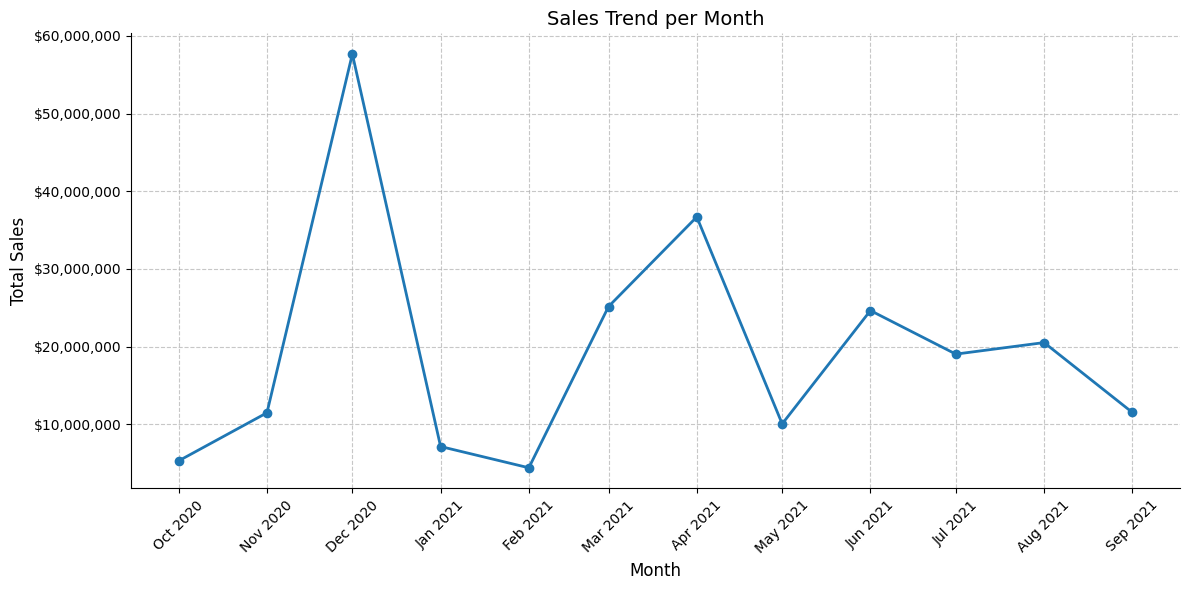

In [28]:
import matplotlib.dates as mdates
from matplotlib.ticker import StrMethodFormatter

# First we extract month and year from 'order_date'
df['month'] = df['order_date'].dt.strftime('%Y-%m')

# The grouping is done by month and total sales is calculated
sales_by_month = df.groupby('month')['total'].sum().reset_index()

# We convert 'month' to datetime for proper ordering
sales_by_month['month'] = pd.to_datetime(sales_by_month['month'])

# Creating the line graph
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the data
ax.plot(sales_by_month['month'], sales_by_month['total'], marker='o', linewidth=2)

# Setting x-axis label and format
ax.set_xlabel('Month', fontsize=12)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45)

# Setting y-axis label and format
ax.set_ylabel('Total Sales', fontsize=12)
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))

# Setting the titles
ax.set_title('Sales Trend per Month', fontsize=14)

# Grid lines for greater readability are also added
ax.grid(True, linestyle='--', alpha=0.7)

# We remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjusting the layout and display the plot
plt.tight_layout()
plt.show()

# Sales by category: Bar chart displaying the proportion of sales for the top 5 best selling categories

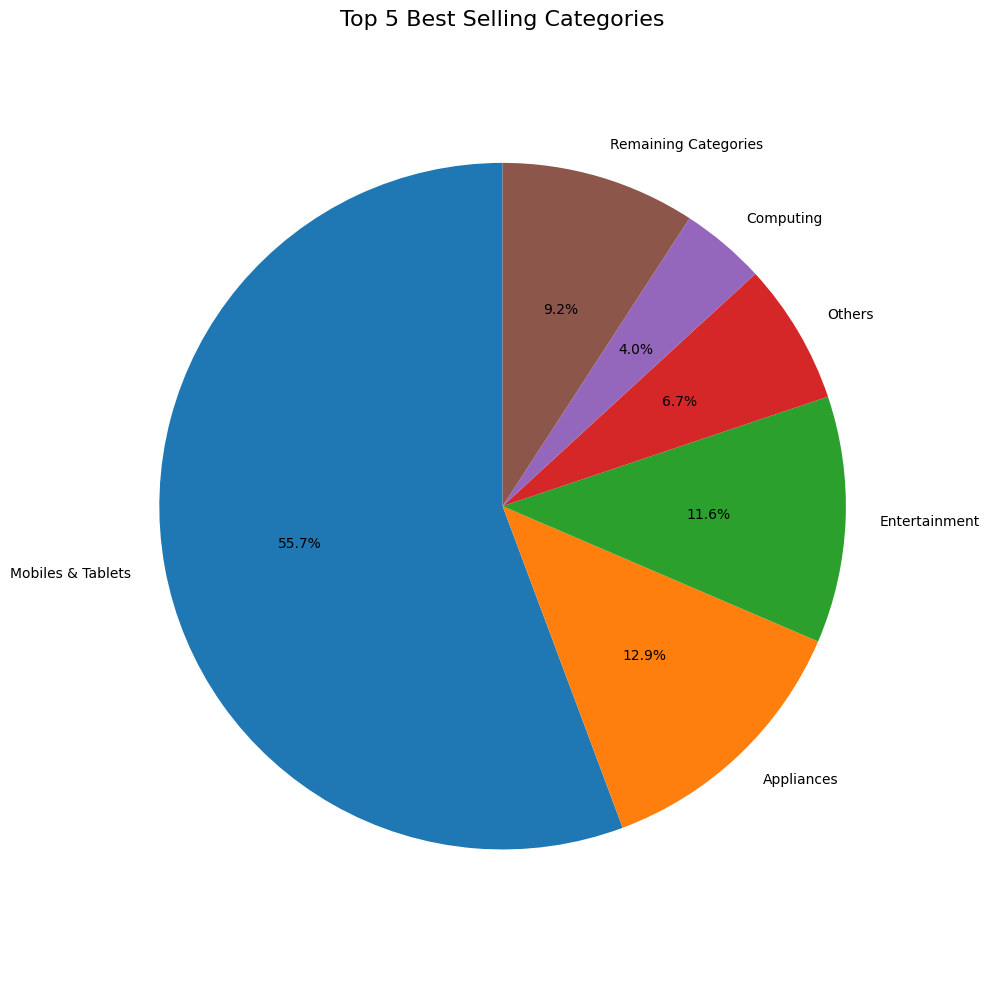

In [29]:
# Group by category and calculate total sales
category_sales = df.groupby('category')['total'].sum().reset_index()

# Sort categories by total sales in descending order
category_sales = category_sales.sort_values('total', ascending=False)

# Get the top 5 categories
top_categories = category_sales.head(5)

# Calculate the total sales for the remaining categories
remaining_sales = category_sales['total'].sum() - top_categories['total'].sum()

# Create a new DataFrame with the top 5 categories and the remaining categories
data = pd.concat([top_categories, pd.DataFrame({'category': 'Remaining Categories', 'total': remaining_sales}, index=[0])], ignore_index=True)

# Create the pie chart
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the data
ax.pie(data['total'], labels=data['category'], autopct='%1.1f%%', startangle=90)

# Add a title
ax.set_title('Top 5 Best Selling Categories', fontsize=16)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Display the plot
plt.tight_layout()
plt.show()

# Customer acquisition and retention: Line graph showing the number of new and retained customers over time

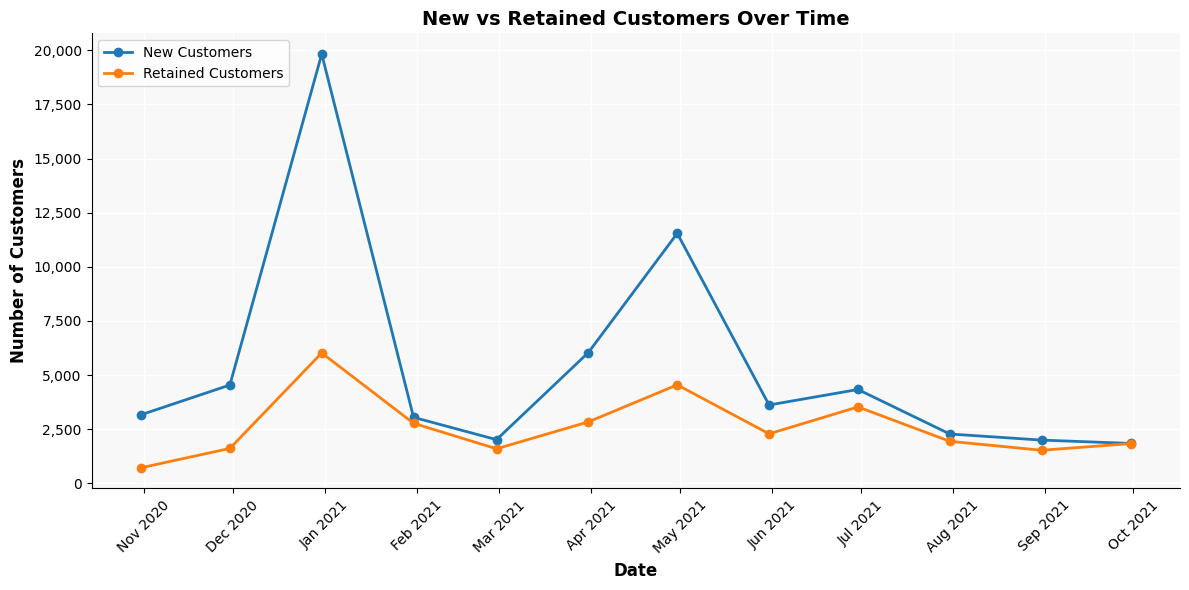

In [36]:
# The 'order_date' is converted to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# We create a new column 'customer_type' to identify new and retained customers
df['customer_type'] = np.where(df.groupby('cust_id')['order_date'].transform('min') == df['order_date'], 'New', 'Retained')

# Now we group by order_date and customer_type, and count the number of customers
customer_counts = df.groupby([pd.Grouper(key='order_date', freq='ME'), 'customer_type']).agg({'cust_id': 'nunique'}).reset_index()

# Pivot the data to create separate columns for new and retained customers
customer_counts_pivot = customer_counts.pivot(index='order_date', columns='customer_type', values='cust_id')

# The missing values are filled with 0
customer_counts_pivot.fillna(0, inplace=True)

# Create the line graph
fig, ax = plt.subplots(figsize=(12, 6))

# Set color palette
colors = ['#1f77b4', '#ff7f0e']

# Plot the data
ax.plot(customer_counts_pivot.index, customer_counts_pivot['New'], marker='o', label='New Customers', color=colors[0], linewidth=2)
ax.plot(customer_counts_pivot.index, customer_counts_pivot['Retained'], marker='o', label='Retained Customers', color=colors[1], linewidth=2)

# Set x-axis label and format
ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Set the x-axis locator to display all months
ax.xaxis.set_major_locator(mdates.MonthLocator())

plt.xticks(rotation=45)

# Set y-axis label and format
ax.set_ylabel('Number of Customers', fontsize=12, fontweight='bold')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Set title
ax.set_title('New vs Retained Customers Over Time', fontsize=14, fontweight='bold')

# Add legend
ax.legend(loc='upper left', fontsize=10, frameon=True)

# Set background color and grid style
ax.set_facecolor('#f8f8f8')
ax.grid(color='white', linewidth=1.0)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Age distribution of customers: Histogram depicting the age ranges of customers

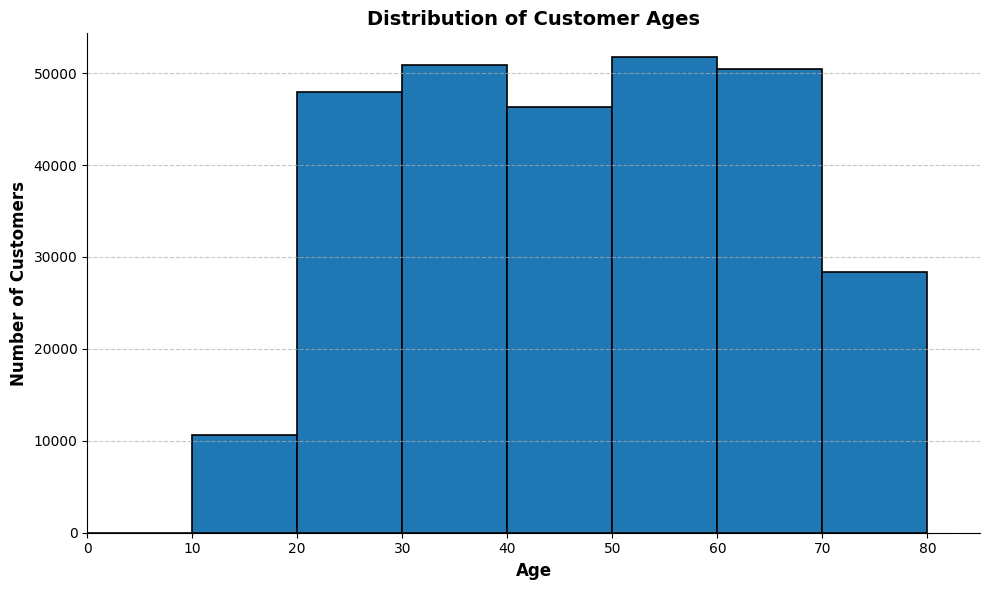

In [31]:
# Creating the histogram
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the histogram
ax.hist(df['age'], bins=range(0, max(df['age']) + 10, 10), edgecolor='black', linewidth=1.2)

# Setting x-axis label and limits
ax.set_xlabel('Age', fontsize=12, fontweight='bold')
ax.set_xlim(0, max(df['age']) + 10)

# Setting y-axis label
ax.set_ylabel('Number of Customers', fontsize=12, fontweight='bold')

# Setting title
ax.set_title('Distribution of Customer Ages', fontsize=14, fontweight='bold')

# Adding grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Removing top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjusting the layout and displaying the plot
plt.tight_layout()
plt.show()

# Sales by region: Choropleth map showing sales performance across different states
# Download the python file to view the Choloropleth map
# An additional Bar Graph has been created first

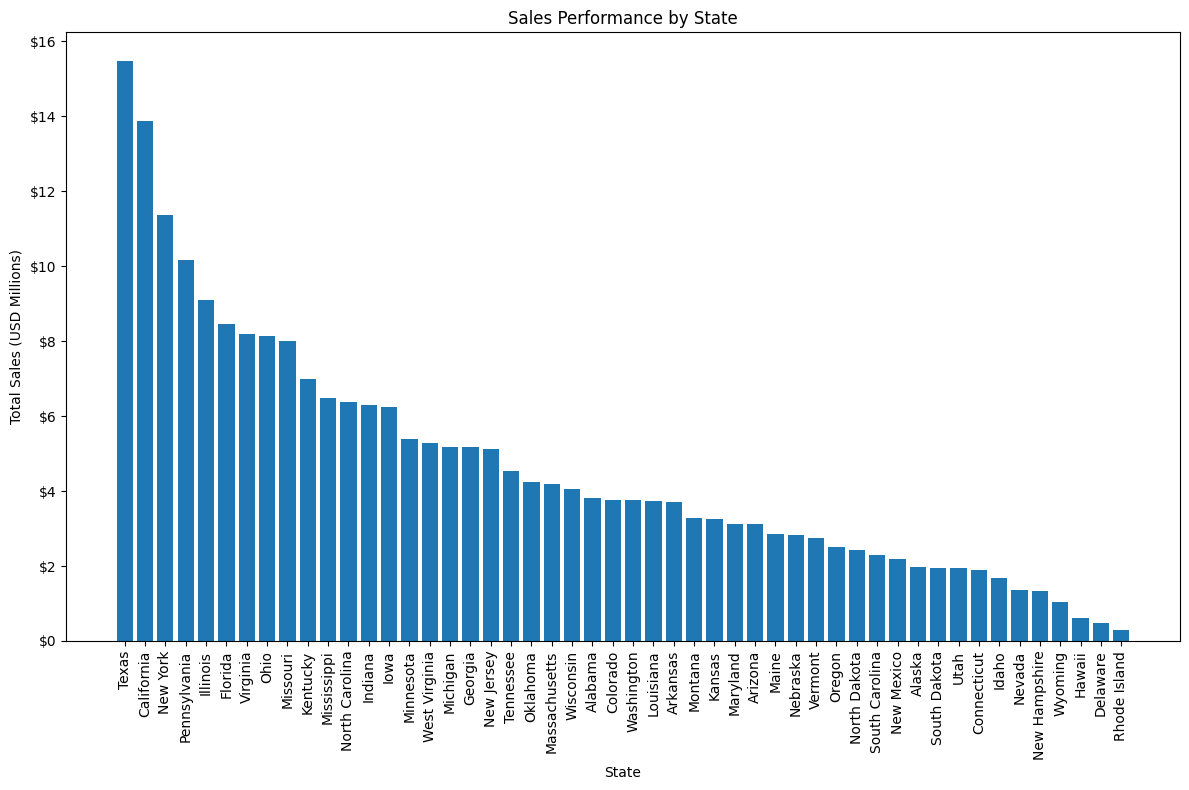

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Dictionary to map state shortforms to complete names
state_names = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}

# Mapping the state shortforms to complete names in the dataset
df['State'] = df['State'].map(state_names)

# Calculating the total sales for each state
state_sales = df.groupby('State')['total'].sum().reset_index()

# Sorting the states by total sales in descending order
state_sales = state_sales.sort_values('total', ascending=False)

# Creating a bar graph
plt.figure(figsize=(12, 8))
plt.bar(state_sales['State'], state_sales['total'] / 1e6)  # Convert to millions
plt.xlabel('State')
plt.ylabel('Total Sales (USD Millions)')
plt.title('Sales Performance by State')

# Format y-axis tick labels to display currency symbol and millions
formatter = ticker.FuncFormatter(lambda x, pos: f'${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Write the labels of x-axis vertically
plt.xticks(rotation=90, ha='center')

plt.tight_layout()
plt.show()

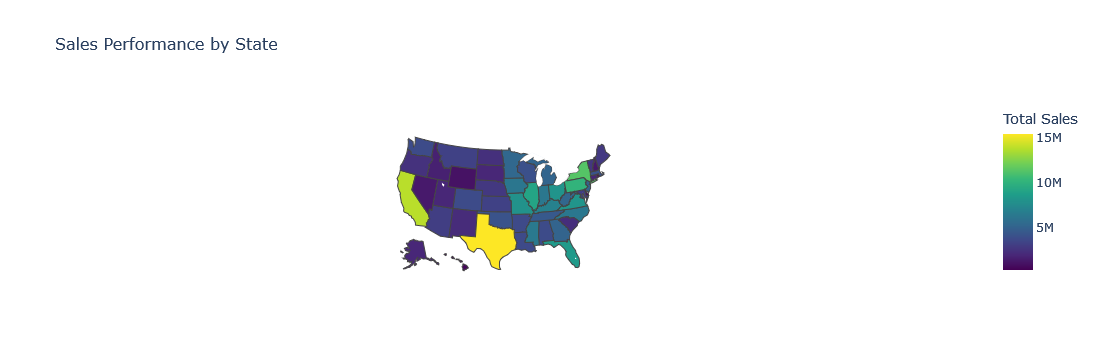

In [44]:
import plotly.express as px

# Grouping by state and calculate total sales
state_sales = df.groupby('State')['total'].sum().reset_index()

# Dictionary to map state abbreviations to full names
state_names = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho',
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
    'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York',
    'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
    'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
    'WI': 'Wisconsin', 'WY': 'Wyoming'
}

# Adding a new column with the full state names
state_sales['State_Name'] = state_sales['State'].map(state_names)

# Creating the Choropleth map
fig = px.choropleth(state_sales,
                    locations='State',
                    locationmode='USA-states',
                    color='total',
                    color_continuous_scale='Viridis',
                    scope='usa',
                    labels={'total': 'Total Sales'},
                    title='Sales Performance by State')

# Updating the layout
fig.update_layout(
    title_font_size=16,
    legend_title_font_size=12,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='albers usa'
    ),
    # Customize the hover label
    hoverlabel=dict(
        bgcolor='white',
        font_size=12,
        font_family='Arial'
    )
)

# Customizing the hover template to display the full state name
fig.update_traces(hovertemplate='<b>%{customdata[0]}</b><br>Total Sales: %{z:,.2f}')

# Updating the custom data with the full state names
fig.update_traces(customdata=state_sales[['State_Name']])

# Displaying the map
fig.show()

# Payment method preference: Bar chart illustrating the distribution of payment methods used by customers

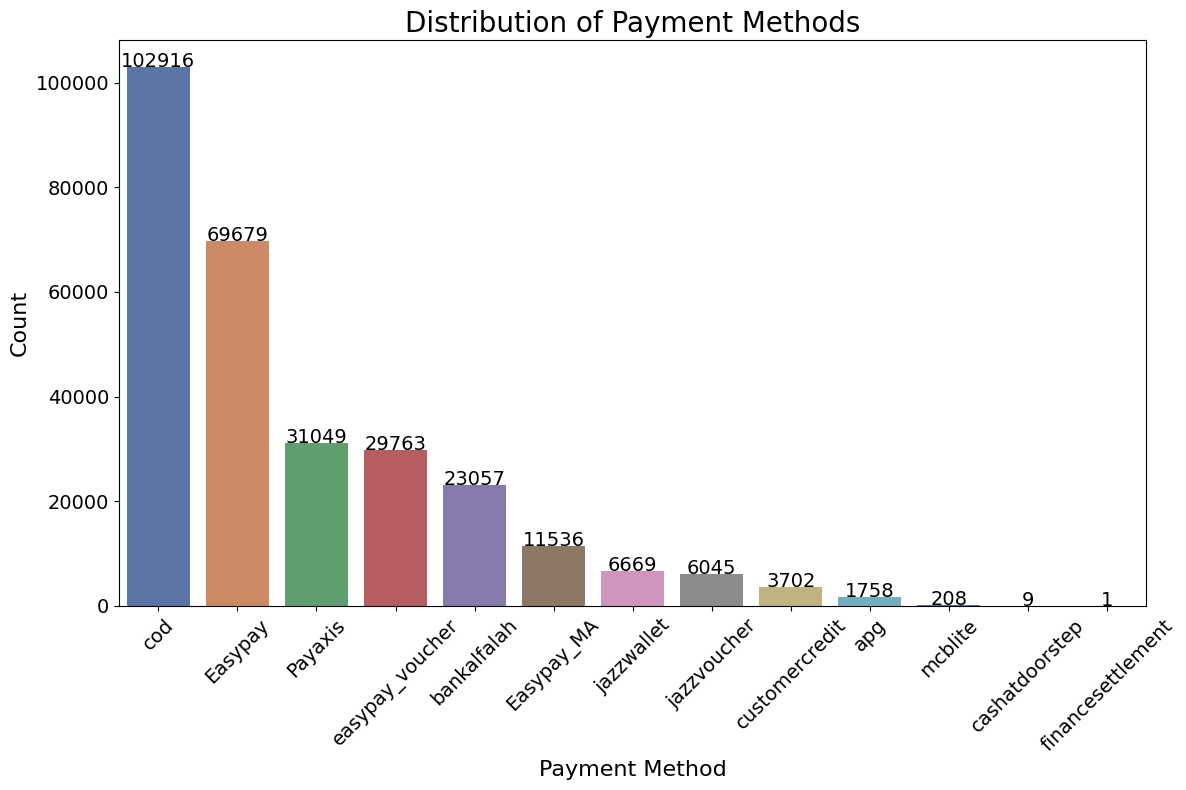

In [33]:
payment_counts = df['payment_method'].value_counts()

# Set figure size
plt.figure(figsize=(12, 8))

# Create a bar graph with larger font sizes and a custom color palette
sns.barplot(x=payment_counts.index, y=payment_counts.values, hue=payment_counts.index, palette="deep", legend=False)

# Set the labels and title with larger font sizes
plt.xlabel('Payment Method', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Distribution of Payment Methods', fontsize=20)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=14)

# Increase the size of y-axis tick labels
plt.yticks(fontsize=14)

# Add value labels on top of each bar
for i, v in enumerate(payment_counts.values):
    plt.text(i, v + 0.1, str(v), fontsize=14, ha='center')

# Adjust the layout to prevent overlapping labels
plt.tight_layout()

# Show the plot
plt.show()

# Discount impact: Scatter plot comparing sales with and without discounts.

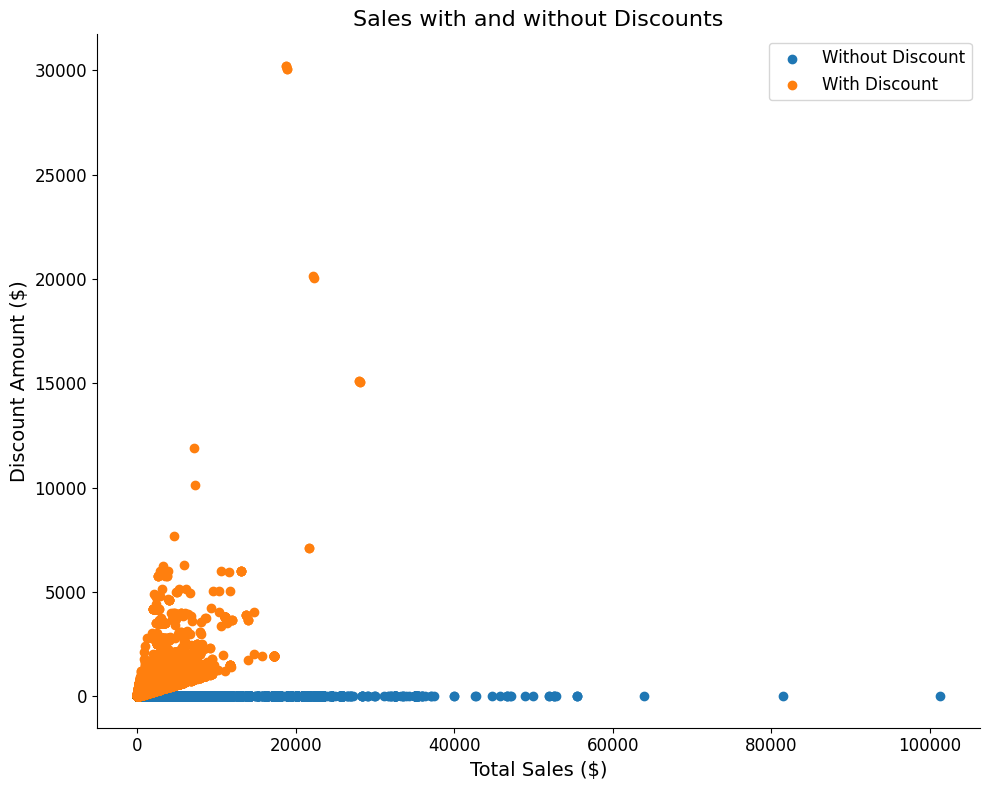

In [45]:
# Creating a new DataFrame with the required columns
plot_data = df[['total', 'discount_amount']].copy()
plot_data['has_discount'] = plot_data['discount_amount'].apply(lambda x: 'With Discount' if x > 0 else 'Without Discount')

# Create a scatter plot
fig, ax = plt.subplots(figsize=(10, 8))

for discount_type in plot_data['has_discount'].unique():
    data = plot_data[plot_data['has_discount'] == discount_type]
    ax.scatter(data['total'], data['discount_amount'], label=discount_type)

# Set the labels and title
ax.set_xlabel('Total Sales ($)', fontsize=14)
ax.set_ylabel('Discount Amount ($)', fontsize=14)
ax.set_title('Sales with and without Discounts', fontsize=16)

# Increase the size of tick labels
ax.tick_params(axis='both', labelsize=12)

# Add a legend
ax.legend(fontsize=12)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()